# Questions
1. Create/get a simple dataset that has one nominal attribute with 3 categories and one continuous attribute. Perform linear regression with two different numerical orderings on the nominal attribute and compare the results.

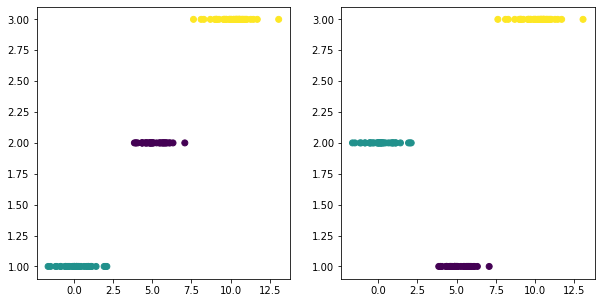

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

P = np.concatenate( [np.random.randn(40), np.random.randn(40) + 5., np.random.randn(40) + 10.] )
R = np.concatenate( [np.ones(40), np.ones(40)+1., np.ones(40)+2.] ) 
data = np.concatenate([[P],[R]],axis=0).T
np.random.shuffle(data)
moddata = data.copy()

moddata[data[:,1]==1.,1]=2.
moddata[data[:,1]==2.,1]=1.

fig, (ax0, ax1) =plt.subplots(nrows=1, ncols=2, figsize=(10,5));
ax0.scatter(data[:,0], data[:,1], c=moddata[:,1], cmap='viridis');
ax1.scatter(moddata[:,0], moddata[:,1], c=moddata[:,1], cmap='viridis');

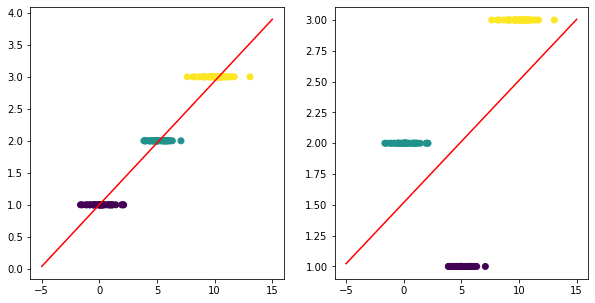

In [ ]:
from sklearn import linear_model
from sklearn import metrics

data_train, data_test = data[:80], data[80:]
moddata_train, moddata_test = moddata[:80], moddata[80:]

x = np.arange(-5, 15, 0.001)
model1 = linear_model.LinearRegression()
model1.fit(X=data_train[:,0].reshape(-1,1), y=data_train[:,1])
y_hat1 = model1.predict(x.reshape(-1,1))


x = np.arange(-5,15,0.001)
model2 = linear_model.LinearRegression()
model2.fit(X=moddata_train[:,0].reshape(-1,1), y=moddata_train[:,1])
y_hat2 = model2.predict(x.reshape(-1,1))

fig, (ax1, ax2) =plt.subplots(nrows=1, ncols=2, figsize=(10,5));
ax1.plot(x,y_hat1,c='r');
ax1.scatter(data[:,0], data[:,1], c=data[:,1], cmap='viridis');

ax2.plot(x,y_hat2,c='r');
ax2.scatter(moddata[:,0], moddata[:,1], c=moddata[:,1],cmap='viridis');

In [ ]:
preds1 = model1.predict(data_test[:,0].reshape(-1,1))
preds2 = model2.predict(moddata_test[:,0].reshape(-1,1))

preds1[preds1<1.5]=1.
preds1[ np.all( [preds1>=1.5, preds1<=2.5], axis=0)  ]=2.
preds1[preds1>2.5]=3.
correct = np.sum( preds1 == data_test[:,1] ) 
print(f'accuracy of linear regression pre modification is : {correct/len(preds1)}')

preds2[preds2<1.5]=1.
preds2[ np.all( [preds2>=1.5, preds2<=2.5], axis=0)  ]=2.
preds2[preds2>2.5]=3.
correct =  np.sum( preds2 == data_test[:,1] ) 
print(f'accuracy of linear regression post modification is : {correct/len(preds2)}')

accuracy of linear regression pre modification is : 1.0
accuracy of linear regression post modification is : 0.65


2. Find a function other than sigmoid function which can map the real line to [0, 1].
> $f(x) = \frac{(x-a)}{(b-a)}$

3. Fit the logistic regression model to the tumor toy dataset and compare with the linear regression based classification results.



Training accuracy with prob threshold at 0.5: 0.5
Training accuracy with prob threshold at 0.5: 1.0



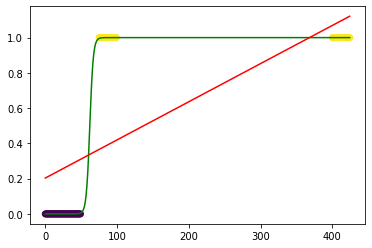

In [ ]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

x = np.array(list(range(50)) + list(range(75, 100)) + list(range(400, 425))).reshape(-1, 1)
y = np.hstack((np.zeros(50), np.ones(50)))

lin_reg = linear_model.LinearRegression()
lin_reg.fit(X=x, y=y)

y_hat = lin_reg.predict(x)
probs = sigmoid(y_hat)
predictions = (probs>0.5)

accuracy = np.sum(predictions==y)/len(y)
print(f"Training accuracy with prob threshold at 0.5: {accuracy}")

log_reg = linear_model.LogisticRegression()
log_reg.fit(X=x, y=y)

y_hat = log_reg.predict(x)
probs = sigmoid(y_hat)
predictions = (probs>0.5)

accuracy = np.sum(predictions==y)/len(y)
print(f"Training accuracy with prob threshold at 0.5: {accuracy}\n")

inx = np.arange(0,425)
plt.plot(inx, log_reg.predict_proba(inx.reshape(-1,1))[:,1], c='g');
plt.plot(inx, lin_reg.predict(inx.reshape(-1,1)), c='r');
plt.scatter(x,y,c=y,cmap='viridis');

4. When is boxplot useful?
> A boxplot is used to describe the distribution of a quantitative variables. In logistic regression it can be used to visualize the distribution of quatitative varibles conditioning on target catergories. It also helps in visulaizing the skewness and outliers in the data.

5. **Answer by hand calculation**: Suppose we have 2054 samples of individuals out of which 880 are men and the rest are women. Among men, 481 attend morning prayers. Among women 582 attend morning prayers. <br>

||attend prayers|don't attend prayers|total|
|---|---|---|---|
|__men__|481|399|880|
|__women__|582|592|1174|
|__total__|1063|991|2054|

 (i) What is the proportion of men who attend morning prayers?<br>
 > 0.547

 (ii) What is the proportion of women who attend morning prayers?<br>
 > 0.496

 (iii) What is the The estimated odds of a man attending morning prayers?<br>
 > 1.207

 (iv) Repeat question (iii) for women.<br>
 > 0.984

 (v) What is the The estimated log-odds of a man attending morning prayers?<br>
 > 0.082

 (vi) Repeat question (v) for women.<br>
 > -0.007

 (vii) From the log-odds computed in questions (v) and (vi), estimate the intercept and slope coefficient in the logistic regression model of predicting if a given individual (man equals 1, woman equals 0) will attend morning prayer or not (attending morning prayer equals 1, not attending morning prayer equals 0).<br>
 > We have the intercept $a=-0.007$ and the slope is $b=0.089$

 (viii)From the estimated log-odds, compute odds ratio given by $\frac{odds_{man}}{odds_{woman}}$ and comment on who is more likely to attend morning prayers and by how much?
 > The odds of Men attending prayer are 1.227 times that of women attending prayer.